(a)  
测量模型：$Z_{t}=CX_{t}+Q$

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

A = np.mat([[1,1],[0,1]])
B = np.mat([[1/2],[1]])
C = np.mat([1,0])

miu0 = np.mat([[0],[0]])
u0 = np.mat([0])
Rt = np.dot(B,B.T)
Qt = 10

(b)
实现测量更新,当t=5时刻的量测更新后，可以看到不确定性椭圆减小了

sigma_bar:
 [[2.5 2. ]
 [2.  2. ]]
sigma_bar:
 [[8.75 4.5 ]
 [4.5  3.  ]]
sigma_bar:
 [[21.  8.]
 [ 8.  4.]]
sigma_bar:
 [[41.25 12.5 ]
 [12.5   5.  ]]
sigma_bar:
 [[71.5 18. ]
 [18.   6. ]]
K:
 [[0.87730061]
 [0.2208589 ]]
miu:
 [[4.38650307]
 [1.10429448]]
sigma:
 [[8.77300613 2.20858896]
 [2.20858896 2.02453988]]


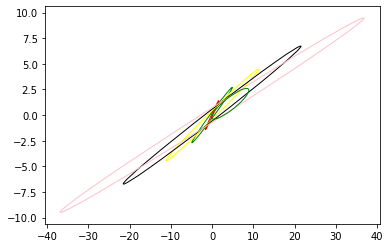

In [22]:
miu = miu0
R = Rt
Q = Qt
u = u0
sigma = Rt


def plot_conversion_ellopse(mean,cov,ax,color='blue',n_std=2):
    eigvals, eigvecs = np.linalg.eigh(cov)
    anglel = np.arctan(-eigvecs[0,0]/eigvecs[1,0])*180.0/3.1415926
    ellipse = Ellipse(xy=(miu[0,0],miu[1,0]), width=eigvals[1], height=eigvals[0], angle=anglel, edgecolor=color, facecolor='none')
    ax.add_patch(ellipse)



fix = plt.figure()
ax = fix.add_subplot(111)

color_que = ['blue','red','green','yellow','black','pink']


miu_bar = miu
sigma_bar = sigma
for i in range(1,6):
    miu_bar = np.dot(A,miu_bar)+B*u
    sigma_bar = np.dot(np.dot(A,sigma_bar),A.T)+R
    print("sigma_bar:\n",sigma_bar)
    plot_conversion_ellopse(miu_bar,sigma_bar,ax,color=color_que[i])


z = 5
K_gain = sigma_bar*C.T*np.linalg.inv(C*sigma_bar*C.T+Q)
miu = miu_bar+K_gain*(z-C*miu_bar)
sigma = (np.eye(2)-K_gain*C)*sigma_bar


print("K:\n",K_gain)
print("miu:\n",miu)
print("sigma:\n",sigma)


plot_conversion_ellopse(miu,sigma,ax,color='green')

plt.autoscale()
plt.show()